In [1]:
import os.path
from importlib import reload 

import matplotlib.pyplot as  plt
import numpy as np 
import cv2

import glob 

# our own utility functions
import  util as u 
import camera_calibration as cc 
import  pipeline as p 


VIDEOS_DIR = r"C:\_DATA\autonomous-driving-nd\Adv_Lane_finding\\"

reload( u )


<module 'util' from 'C:\\Users\\mrestrepo\\git\\CarND-Adv-Lane\\util.py'>

### Camera calibration

We first load a distorted image

img_filename = ./camera_cal\calibration1.jpg ret=False len(corners)=0 len(imgpoints)=0
img_filename = ./camera_cal\calibration10.jpg ret=True len(corners)=54 len(imgpoints)=1
img_filename = ./camera_cal\calibration11.jpg ret=True len(corners)=54 len(imgpoints)=2
img_filename = ./camera_cal\calibration12.jpg ret=True len(corners)=54 len(imgpoints)=3
img_filename = ./camera_cal\calibration13.jpg ret=True len(corners)=54 len(imgpoints)=4
img_filename = ./camera_cal\calibration14.jpg ret=True len(corners)=54 len(imgpoints)=5
img_filename = ./camera_cal\calibration15.jpg ret=True len(corners)=54 len(imgpoints)=6
img_filename = ./camera_cal\calibration16.jpg ret=True len(corners)=54 len(imgpoints)=7
img_filename = ./camera_cal\calibration17.jpg ret=True len(corners)=54 len(imgpoints)=8
img_filename = ./camera_cal\calibration18.jpg ret=True len(corners)=54 len(imgpoints)=9
img_filename = ./camera_cal\calibration19.jpg ret=True len(corners)=54 len(imgpoints)=10
img_filename = ./camera_cal\cali

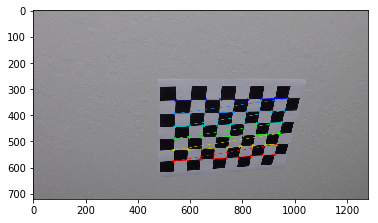

In [2]:
nx = 9 
ny = 6

img_filenames = glob.glob("./camera_cal/calibration*.jpg") 

mtx, dist = cc.calibrate_cam( img_filenames, nx=nx, ny=ny, draw=1)

In [ ]:
mtx, dist

In [ ]:
#help( plt.figure )
img = u.rgb_read( './camera_cal/calibration3.jpg' )
undistorted = cv2.undistort(img, mtx, dist, None, mtx)

fig, (ax1,ax2) = plt.subplots( 1,2, figsize=(16,6) )
ax1.set_title( 'Original image')
ax1.imshow( img )
ax2.set_title( 'Undistorted image')
ax2.imshow( undistorted )

## Pipeline (test images) 

In [ ]:
test_img_fns = glob.glob( './test_images/*.jpg' ) 

In [ ]:
for img_fn in test_img_fns : 
    distorted = u.rgb_read( img_fn )
    undistorted = cv2.undistort(img, mtx, dist, None, mtx)    
    name_noext, _ = os.path.splitext( os.path.basename( img_fn )) 
    out_fn =  'output_images/' + name_noext + '_undistorted.jpg'
    print( "Writing " + out_fn ) 
    cv2.imwrite( out_fn , undistorted  )

In [ ]:
u.show2( distorted, undistorted, title1='Original image', title2='Undistored_image' )

In [ ]:
binary = p.get_lane_pixels( undistorted )

In [ ]:
plt.imshow( binary, cmap='gray')

In [ ]:
reload( p )

distorted = u.rgb_read( "test_images/straight_lines2.jpg" )
undistorted = cv2.undistort(distorted, mtx, dist, None, mtx)

imgc = undistorted.copy()
corners = p.construct_trapezoid( imgc, top_offset = 100, alpha_top = 0.37, alpha_bottom=0.72 )

p.draw_four_corners( imgc, corners )

M, dst_points = p.get_perspective_transform( imgc, corners,offset_x=200 )

warped = p.warp_perspective(undistorted,  M )

p.draw_four_corners( warped, dst_points, color=(0,255, 40), tkn=5 )

u.show2( imgc, warped )


In [ ]:
reload( u )
bin_gray = u.binary2gray( binary ) 


In [ ]:
warped_gray = p.warp_perspective( bin_gray, M, flags=cv2.INTER_LINEAR)
plt.imshow( warped_gray, cmap='gray' )

In [ ]:
reload(p)

In [ ]:
reload( u )
window_width  = 50
window_height = 80
margin = 100

out = p.show_window_search_results( warped_u8, window_width, window_height, margin ) 
u.show(out) 

In [ ]:
del right_lane

In [ ]:
reload(p)
window_centroids, left_lane, right_lane = p.sliding_window_search(warped_u8, win_w=window_width, 
                                                                  win_h=window_height, margin=margin)

In [ ]:
reload(u )
u.show2( left_lane,  right_lane )

In [ ]:
distorted = u.rgb_read( "test_images/test1.jpg" )
undistorted = cv2.undistort(distorted, mtx, dist, None, mtx)
warped = p.warp_perspective(undistorted,  M )
binary3 = np.uint8( p.get_lane_pixels( undistorted ) * 255 ) 

#b3 = u.binary2rgb( binary )
warp_bin = p.warp_perspective( binary3, M )

c, left_lane, right_lane = p.sliding_window_search(warp_bin, win_w=window_width, win_h=window_height, margin=margin)


In [ ]:
u.show2( left_lane, right_lane )

In [ ]:
left_fit, right_fit 

# Visualization
left_lane_rgb = u.binary2rgb( left_lane )

img_height=left_lane.shape[0]

ploty = np.linspace(0, img_height - 1, img_height)
left_fitx  = np.polyval( left_fit, ploty ) 
right_fitx = np.polyval( right_fit, ploty )

In [ ]:
#u.np_describe( left_fitx )
#plt.plot( left_fitx, ploty ) 

left_curve  = np.polyval( left_fit , nonzeroy )
right_curve = np.polyval( right_fit, nonzeroy )

    left_lane_inds  = ( (nonzerox < left_curve  + margin) & ( nonzerox >= left_curve  - margin ) ).nonzero()[0]
    right_lane_inds = ( (nonzerox < right_curve + margin) & ( nonzerox >= right_curve - margin ) ).nonzero()[0]

left_lane_rgb[ np.int16(ploty), np.int16(left_fitx), : ] = [255, 0, 0 ]

u.show( left_lane_rgb )

In [ ]:
distorted.shape

In [ ]:
reload( p )
reload( u )

params = {
    "cam_mtx" : mtx, 
    "cam_dist" : dist, 
    "persp_M"  : M,
    "persp_M_inv"  : np.linalg.inv( M ),
    "window_width" : 50, 
    "window_height" : 80, 
    "margin" : 100,
    "xm_per_pix" : 3.7/700,
    "ym_per_pix" : 30/720, 
    "out_size_wh" : (640, 360)
}

video_path = VIDEOS_DIR + "Project_video.mp4"
output_video_path = VIDEOS_DIR + "Project_video_lanes_identified.avi"
           
p.pipeline_on_video( video_path,  params,
                     start_frame=600,
                     end_frame=800,
                     out_video_path = output_video_path )

In [ ]:
cap = cv2.VideoCapture( video_path )

In [ ]:
cap.get( cv2.CAP_PROP_FPS ) 

In [ ]:
help( cap.get )

In [ ]:
u.show( img )

In [ ]:
np.linalg.inv( M )

In [ ]:
help( cv2.warpPerspective )

In [ ]:
und1 = undistorted.copy() 

unwarped = cv2.warpPerspective(img,  np.linalg.inv(M),
                               dsize= (undistorted.shape[1], undistorted.shape[0]),                               
                               flags=cv2.INTER_LINEAR)

mask = (unwarped[...,0] != 0) & (unwarped[...,1] != 0) & (unwarped[...,2] != 0) 

und1[mask] = unwarped[mask]

u.show( und1 )